# 1. DataProfile (TPE)

In [1]:
#載入套件
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import missingno as msno

#匯入自己寫的程式
import dataframe_format as ff

In [2]:
#匯入原始檔案
df = pd.read_csv('0_tpe.csv', low_memory=False)
df.head()

#轉換表頭名稱、去除重複的英文表頭
df = ff.change_cols_names(df)
df = ff.drop_eng_headers(df)

Drop English Headers...
42
Finish!


In [3]:
#查看參數
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220815 entries, 0 to 220814
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Column1               220815 non-null  int64  
 1   District              220815 non-null  object 
 2   Subject               220815 non-null  object 
 3   Address               220815 non-null  object 
 4   LandArea              220815 non-null  object 
 5   UrbanZoning           219519 non-null  object 
 6   NonUrbanZoning        29 non-null      object 
 7   NonUrbanDesignation   0 non-null       object 
 8   TransactionDate       220815 non-null  object 
 9   NumberOfTransactions  220815 non-null  object 
 10  Floor                 220571 non-null  object 
 11  Storeys               220325 non-null  object 
 12  Type                  220815 non-null  object 
 13  Purpose               216486 non-null  object 
 14  Material              220763 non-null  object 
 15  

In [4]:
#各欄位缺失植數量
missing_values = df.isna().sum()
#print(missing_values)
missing_value_true = missing_values[missing_values > 1]
print(missing_value_true)
print(len(df))

UrbanZoning              1296
NonUrbanZoning         220786
NonUrbanDesignation    220815
Floor                     244
Storeys                   490
Purpose                  4329
Material                   52
CompletionDate          21565
UnitPrice                 158
ParkingSpaceType       145382
ParkingArea            115106
Remarks                113582
Elevator               157673
TransferNumber         206742
ParkingArea_1          105709
dtype: int64
220815


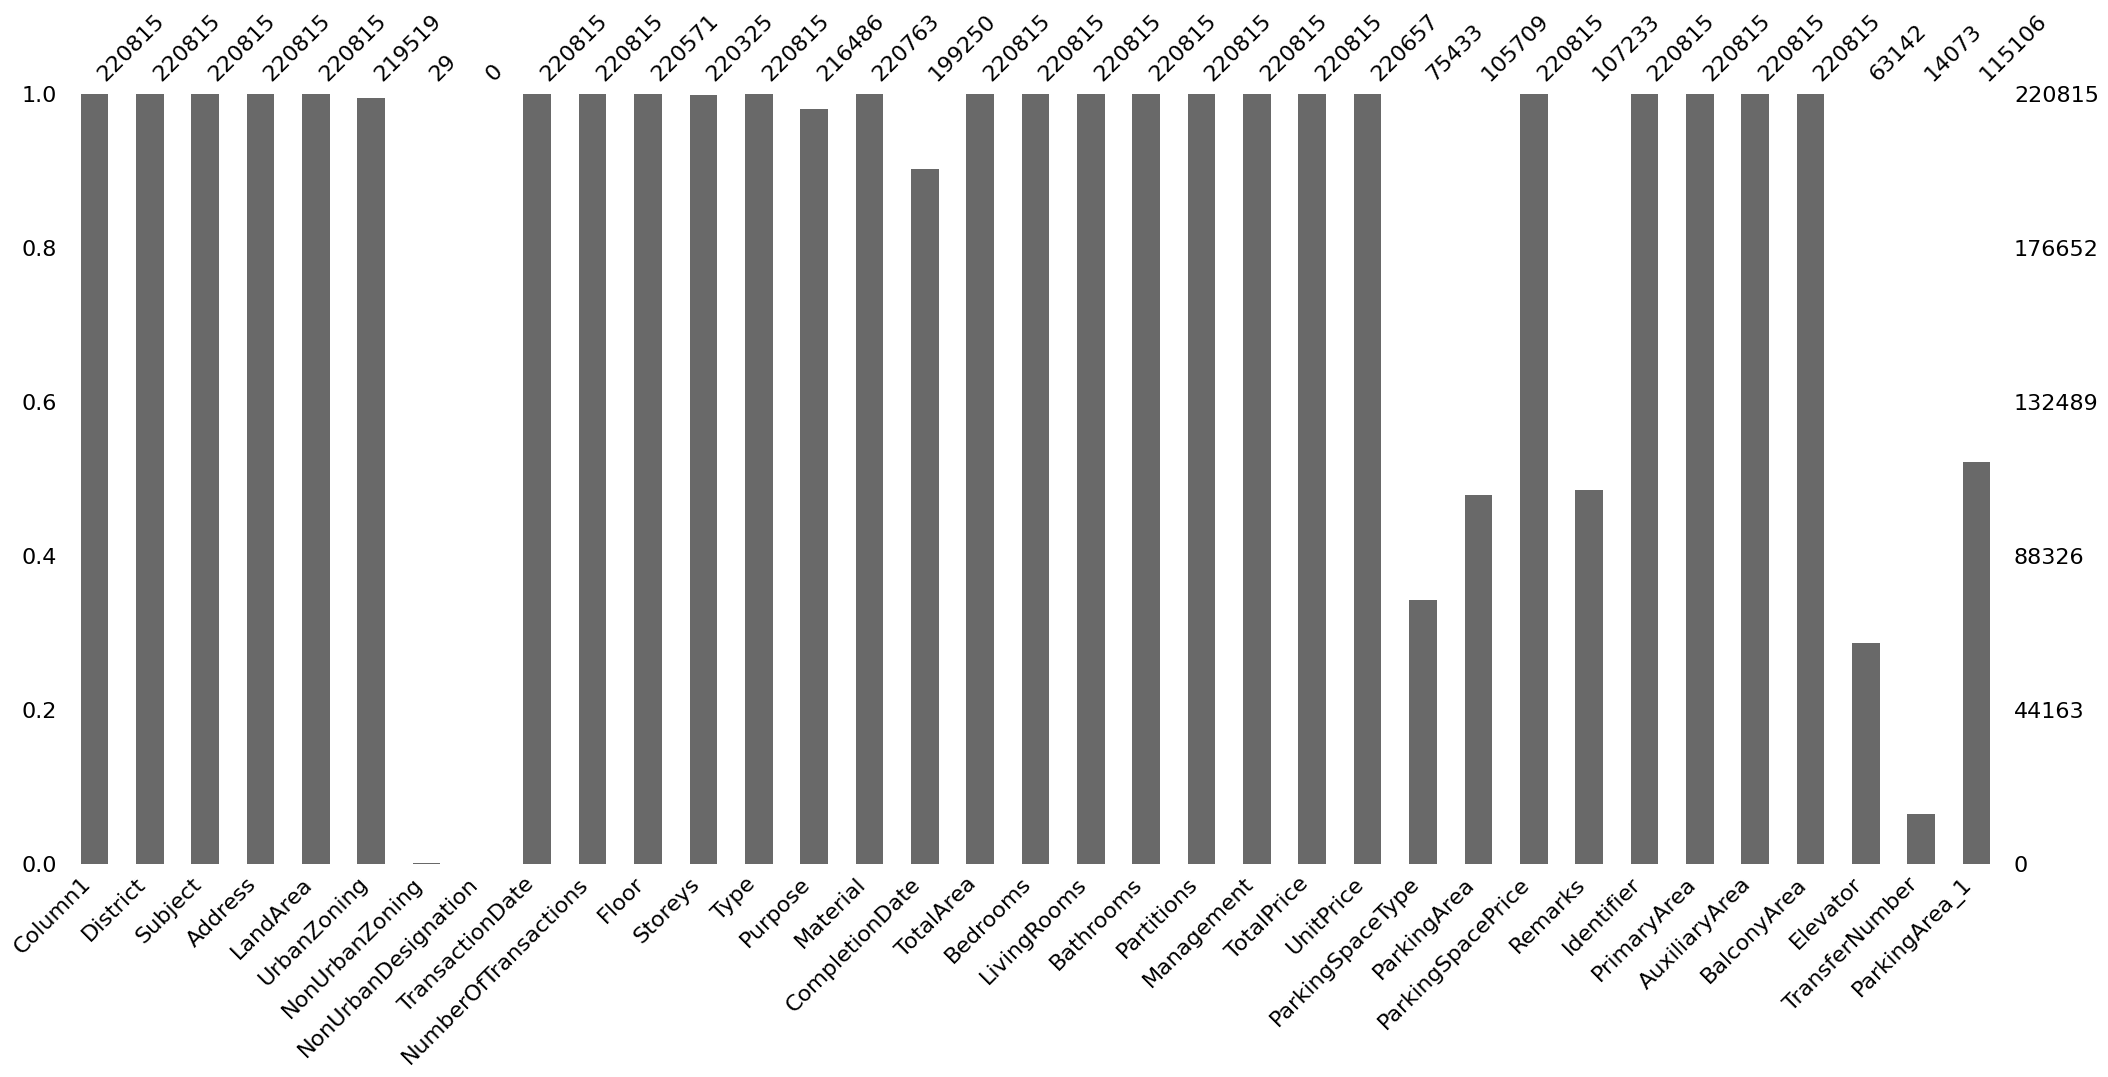

In [5]:
#缺失值柱狀圖
msno.bar(df)
plt.show()

#msno.bar(df, figsize=(14,6), fontsize=11, color="#B29177", log=True, sort="descending")

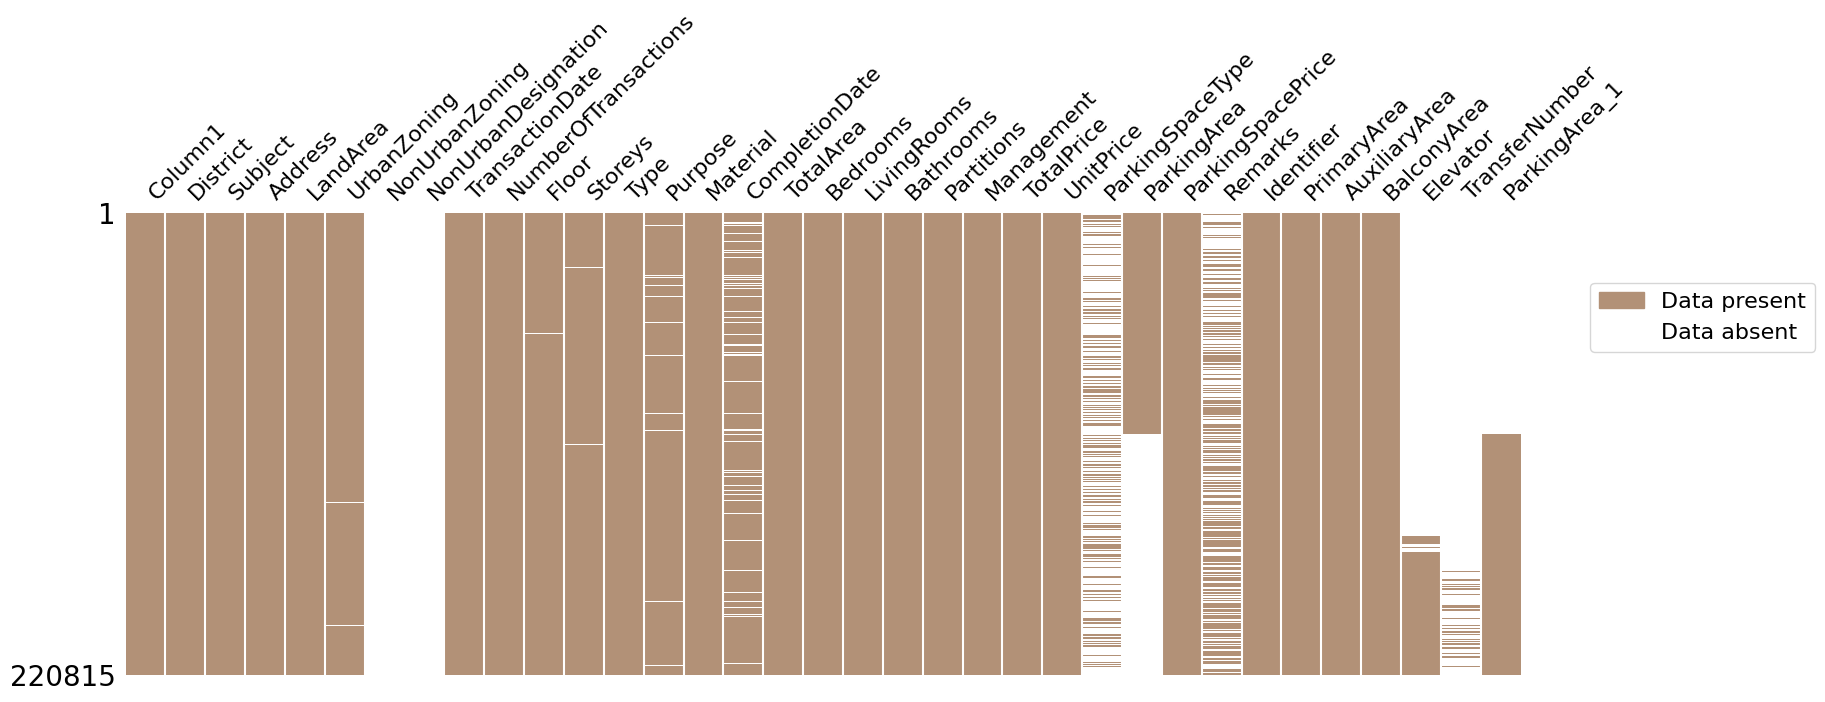

In [6]:
#缺失值矩陣事件圖 matrix
msno.matrix(df, sparkline=False, figsize=(18,6), fontsize=16, color=(0.7, 0.57, 0.47));
gray_patch = mpatches.Patch(color='#B29177', label='Data present')
white_patch = mpatches.Patch(color='white', label='Data absent')
plt.legend(loc=[1.05,0.7], handles=[gray_patch, white_patch], fontsize=16)
plt.show()

<Axes: >

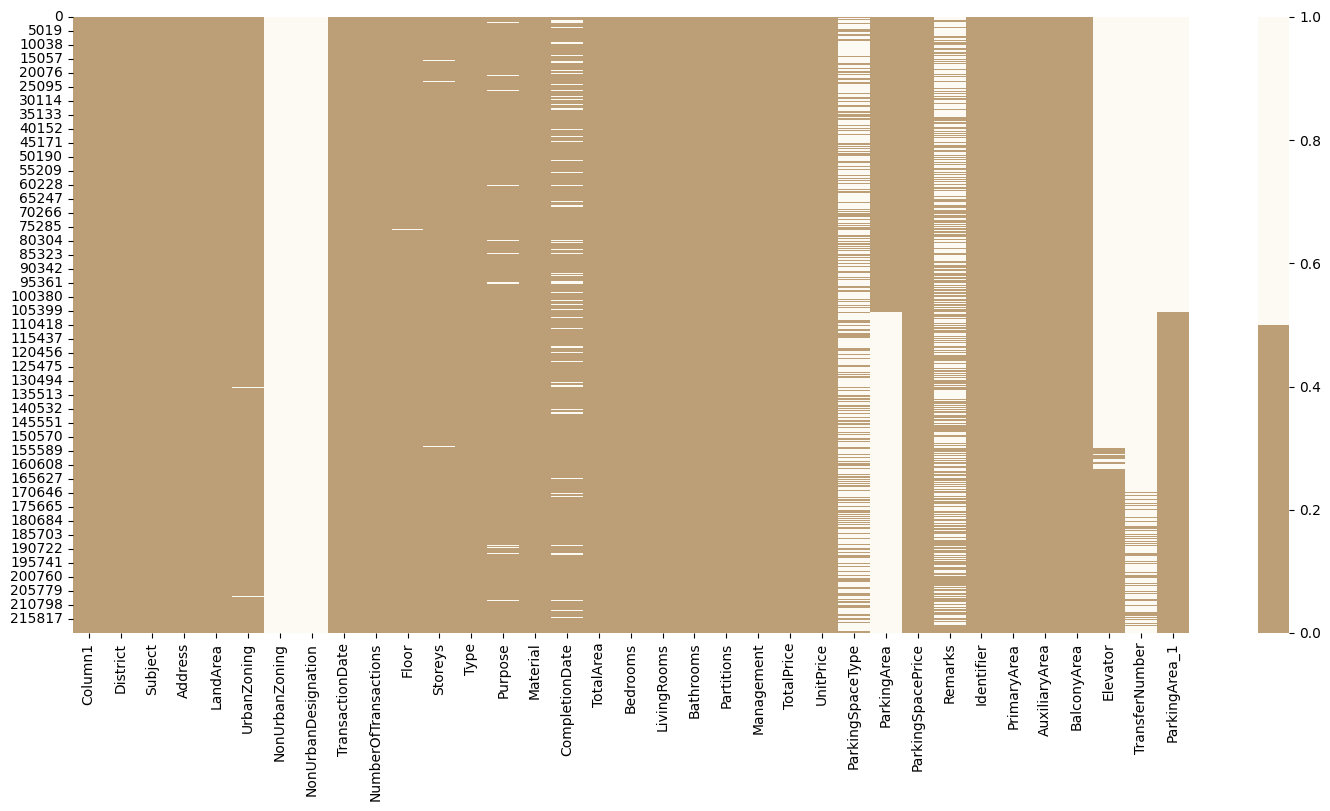

In [7]:
#缺失值矩陣圖(使用seaborn)
plt.figure(figsize=(18,8))
colours = ['#BC9F77', '#FCFAF2'] 
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))

<Axes: >

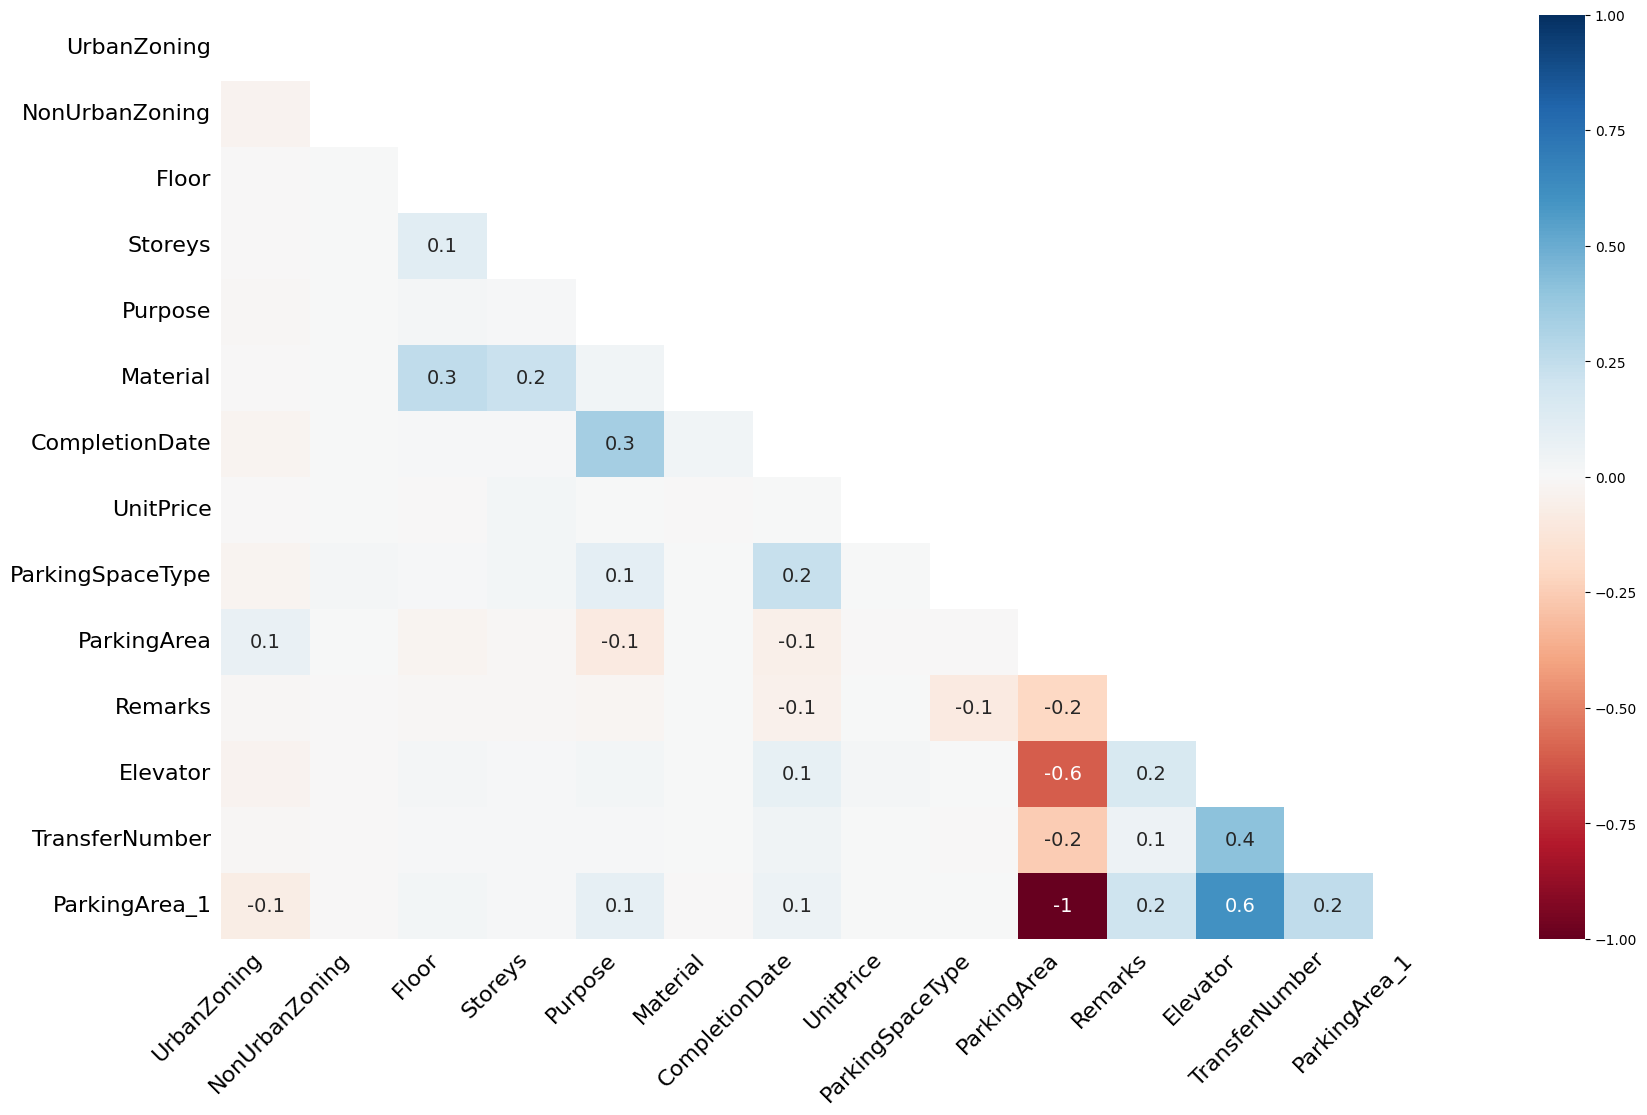

In [8]:
#缺失值相關係數熱圖 Correlation heatmap
msno.heatmap(df)

<Axes: >

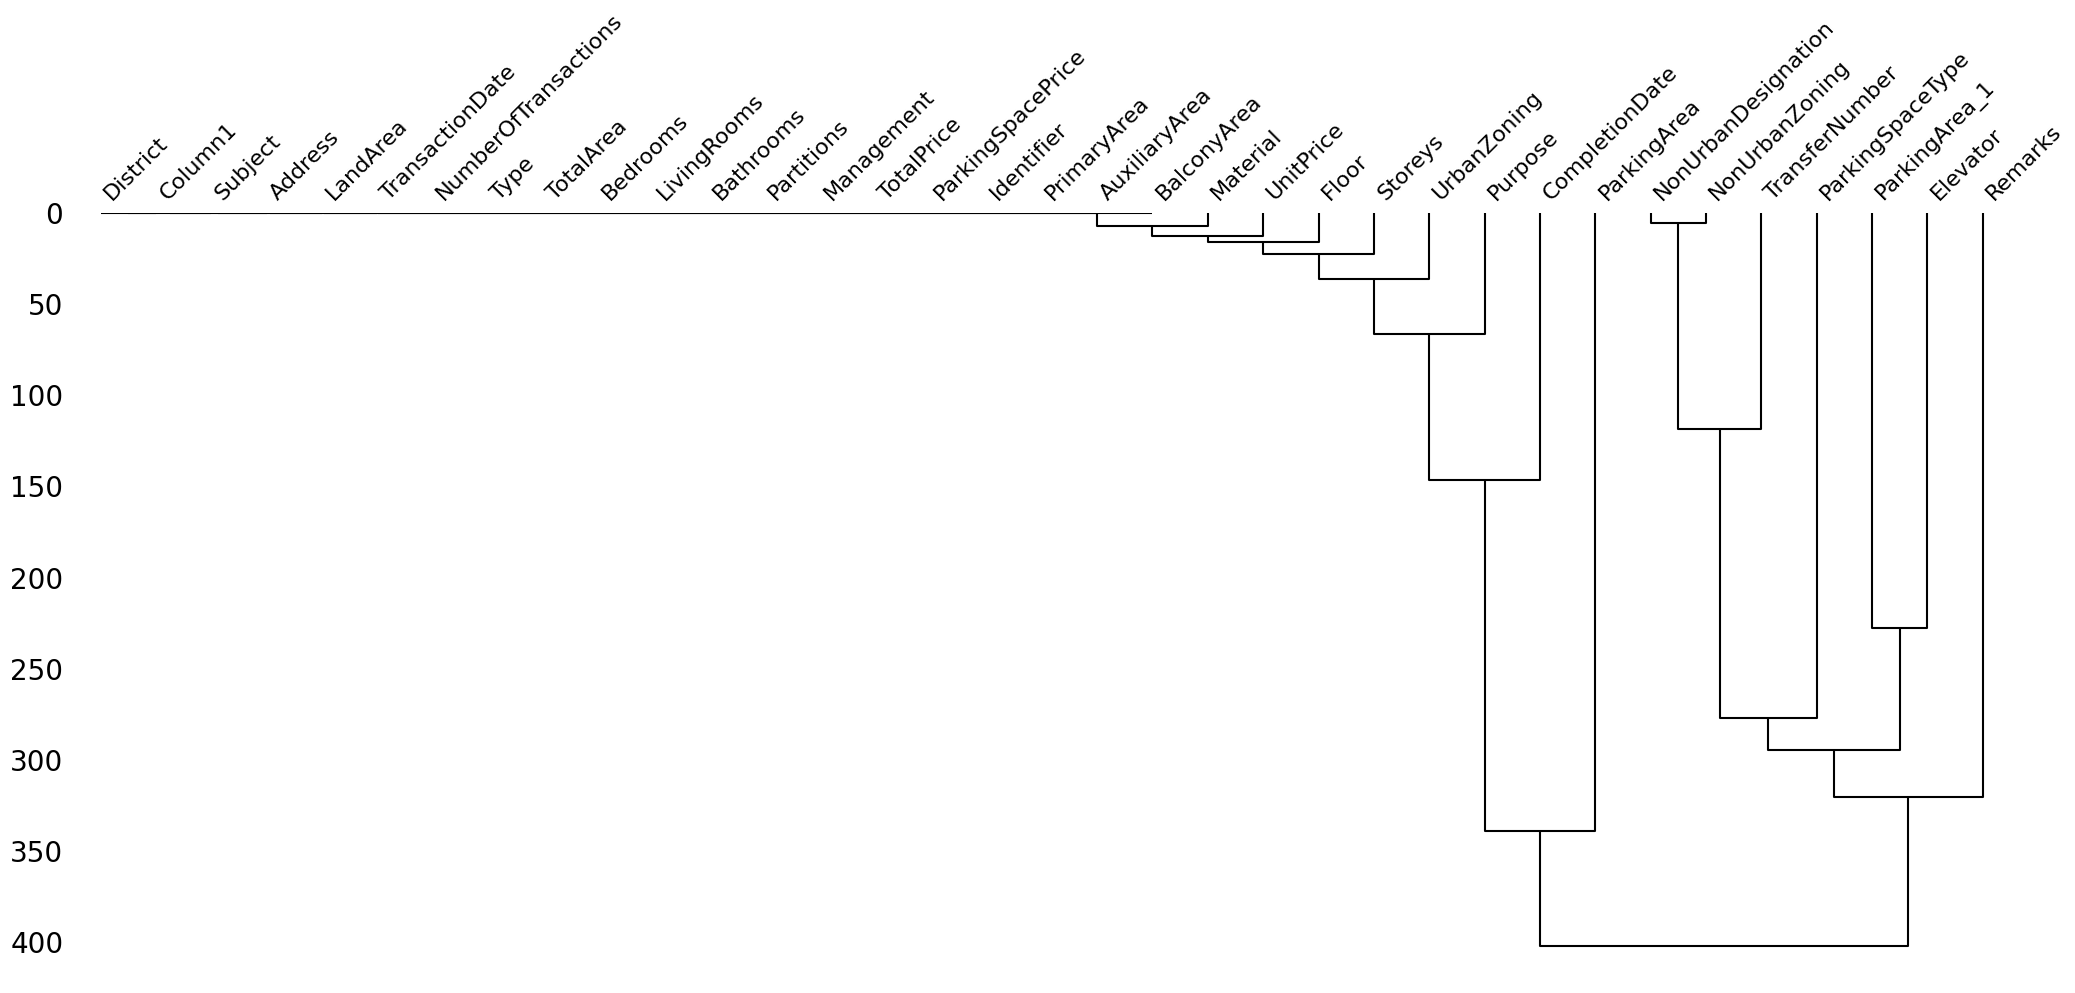

In [9]:
msno.dendrogram(df)

In [10]:
df.to_csv('1_dataprofile.csv', encoding='utf-8-sig', index=False)